## BT4211 Group 9 Hotel Project 

### Jupyter Notebook to: 
- ML Regression Task to predict: 
    1. $\frac{Confirmed+NoShow}{Total Bookings} \rightarrow$ RATIO
    2. Other Revenue Per Room (Average)
- Use below formula to find forecasted future revenue stream 

$\sum^{T} \sum^{N} RATIO \times (Lodging Revenue Per Room + Other Revenue Per Room) \times Total Rooms Booked By Customer$

### Project Setup 

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import feature_selection
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [22]:
# Read in cleaned dataset 
hotel_df = pd.read_csv("HotelCustomersDataset_Cleaned.csv")
hotel_df.drop("Unnamed: 0", axis=1, inplace= True) # Drop the weird 1st index column
hotel_df

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,...,0,0,0,0,0,1,0,0,0,0
1,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,0,1
2,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,...,0,0,1,0,0,0,0,0,0,1
3,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,0,1
4,6,JPN,54.0,1095,0x6E70C1504EB27252542F58E4D3C8C83516E093334721...,0xE82EC1D6938A04CF19E1F7F55A402E7ABC686261537A...,58,230.0,24.0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75392,83585,ITA,52.0,0,0xC93C23F50B11F71BD77EC36202B9D42AB0BAA8E77F9F...,0x7AE14552CC1ABDB74EED8F709E9ECDDA822F164C704F...,116,336.9,105.5,0,...,0,0,1,0,0,0,0,0,1,0
75393,83586,ITA,54.0,0,0x68010434A46BA6CEAFFACF00B7B7CD0E1825DC56E68F...,0x0A4038E9AE1E4E5A14832BEACEC6BCBE2219F275B65C...,0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,1,0
75394,83587,IRL,47.0,0,0x6DE7954E6AF065D29EF5C57D0DC8120FBAE6753D2CCB...,0xC0654B6A53840DD95DAE429966EC16E2A11FB186CC7B...,109,327.1,277.5,0,...,0,0,1,0,0,0,0,0,1,0
75395,83588,IRL,53.0,0,0x533C977BA6D1D8DFAD8D8D4C2250236D16EFD17B9F35...,0x3DCBEB254247836015CA95F0BBF42E6AF6A158380663...,0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,1,0


In [23]:
hotel_df.dtypes

ID                                               int64
Nationality                                     object
Age                                            float64
DaysSinceCreation                                int64
NameHash                                        object
DocIDHash                                       object
AverageLeadTime                                  int64
LodgingRevenue                                 float64
OtherRevenue                                   float64
BookingsCanceled                                 int64
BookingsNoShowed                                 int64
BookingsCheckedIn                                int64
PersonsNights                                    int64
RoomNights                                       int64
DaysSinceLastStay                                int64
DaysSinceFirstStay                               int64
SRHighFloor                                      int64
SRLowFloor                                       int64
SRAccessib

### Further Pre-processing

In [24]:
# Drop the ID, Nationality, Name Hash and DocID Hash 
hotel_df.drop(columns = ["ID", "Nationality", "NameHash", "DocIDHash"], inplace = True)

In [25]:
# Creating the Ratio Metric needed as one of our dependent variable
hotel_df["Ratio"] = (hotel_df["BookingsCheckedIn"] + hotel_df["BookingsNoShowed"]) / \
    (hotel_df["BookingsCheckedIn"] + hotel_df["BookingsNoShowed"] + hotel_df["BookingsCanceled"])

# NaNs are referring to those who have never stayed and made booking with the hotel before 
# For prediction task we can only use those who have previously at least made booking before
hotel_df_hasbooked = hotel_df.dropna(subset = ["Ratio"])
hotel_df_hasbooked = hotel_df_hasbooked.reset_index()
hotel_df_hasbooked.drop("index", axis = 1, inplace=True)
hotel_df_hasbooked

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator,Ratio
0,51.0,150,45,371.0,105.3,1,0,3,8,5,...,0,0,0,0,1,0,0,0,0,0.75
1,60.0,1095,93,240.0,60.0,0,0,1,10,5,...,0,1,0,0,0,0,0,0,1,1.00
2,54.0,1095,58,230.0,24.0,0,0,1,4,2,...,0,1,0,0,0,0,0,1,0,1.00
3,32.0,1095,38,535.0,94.0,0,0,1,10,5,...,0,1,0,0,0,0,0,1,0,1.00
4,25.0,1095,96,174.0,69.0,0,0,1,6,3,...,0,1,0,0,0,0,0,0,1,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59782,48.0,0,20,176.0,147.0,0,0,1,4,2,...,0,1,0,0,0,0,0,1,0,1.00
59783,49.0,0,91,143.0,2.0,0,0,1,2,1,...,0,1,0,0,0,0,0,1,0,1.00
59784,52.0,0,116,336.9,105.5,0,0,1,8,4,...,0,1,0,0,0,0,0,1,0,1.00
59785,47.0,0,109,327.1,277.5,0,0,1,6,3,...,0,1,0,0,0,0,0,1,0,1.00


In [26]:
# Standard Scaler the appropriate numeric columns 
scaled_columns = ["Age", "DaysSinceCreation", "AverageLeadTime", "LodgingRevenue"]

# Scale using Sklearn standard scaler
hotel_df_hasbooked_scaled = hotel_df_hasbooked.copy()
scaler = preprocessing.StandardScaler()
hotel_df_hasbooked_scaled[scaled_columns] = scaler.fit_transform(
    hotel_df_hasbooked_scaled[scaled_columns])
hotel_df_hasbooked_scaled

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator,Ratio
0,0.219923,-1.223860,-0.465691,-0.060152,105.3,1,0,3,8,5,...,0,0,0,0,1,0,0,0,0,0.75
1,0.843965,1.914118,0.059925,-0.415203,60.0,0,0,1,10,5,...,0,1,0,0,0,0,0,0,1,1.00
2,0.427937,1.914118,-0.323337,-0.442307,24.0,0,0,1,4,2,...,0,1,0,0,0,0,0,1,0,1.00
3,-1.097498,1.914118,-0.542343,0.384340,94.0,0,0,1,10,5,...,0,1,0,0,0,0,0,1,0,1.00
4,-1.582863,1.914118,0.092776,-0.594084,69.0,0,0,1,6,3,...,0,1,0,0,0,0,0,0,1,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59782,0.011909,-1.721952,-0.739449,-0.588664,147.0,0,0,1,4,2,...,0,1,0,0,0,0,0,1,0,1.00
59783,0.081247,-1.721952,0.038024,-0.678104,2.0,0,0,1,2,1,...,0,1,0,0,0,0,0,1,0,1.00
59784,0.289261,-1.721952,0.311782,-0.152574,105.5,0,0,1,8,4,...,0,1,0,0,0,0,0,1,0,1.00
59785,-0.057428,-1.721952,0.235130,-0.179135,277.5,0,0,1,6,3,...,0,1,0,0,0,0,0,1,0,1.00


<Axes: >

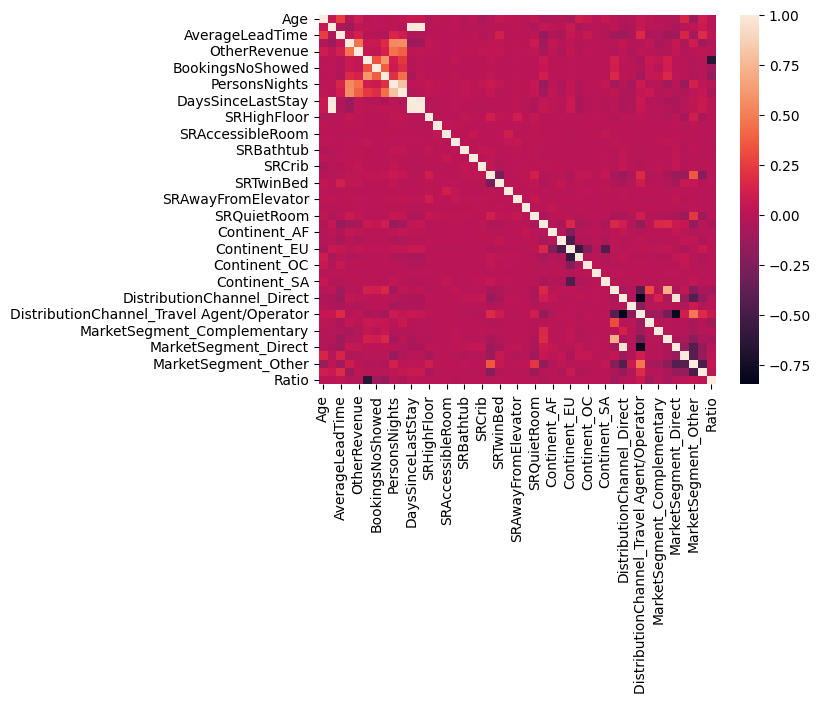

In [27]:
# Create corr heatmap 
corr = hotel_df_hasbooked_scaled.corr()
sns.heatmap(corr)

### Determining Appropriate Variables to use for Prediction Task

RFE for Ratio

In [28]:
# Find appropriate variables using Recursive Feature Engineering (RFE)
rfe_ratio = feature_selection.RFE(
    estimator=tree.DecisionTreeRegressor(), n_features_to_select=10)

rfe_ratio.fit(hotel_df_hasbooked_scaled.drop(
    columns=["Ratio"]), hotel_df_hasbooked_scaled["Ratio"])

selected_features_ratio_df = hotel_df_hasbooked_scaled.drop(
    columns=["Ratio"]).loc[:, rfe_ratio.support_]

selected_features_ratio_df

,Age,AverageLeadTime,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceFirstStay,SRMediumFloor,Continent_Other
0,0.219923,-0.465691,1,0,3,8,5,1074,0,0
1,0.843965,0.059925,0,0,1,10,5,1100,0,0
2,0.427937,-0.323337,0,0,1,4,2,1097,0,0
3,-1.097498,-0.542343,0,0,1,10,5,1100,0,0
4,-1.582863,0.092776,0,0,1,6,3,1098,0,0
...,...,...,...,...,...,...,...,...,...,...
59782,0.011909,-0.739449,0,0,1,4,2,2,0,0
59783,0.081247,0.038024,0,0,1,2,1,1,0,0
59784,0.289261,0.311782,0,0,1,8,4,4,0,0
59785,-0.057428,0.235130,0,0,1,6,3,3,0,0


RFE for Other Revenue

In [29]:
# Find appropriate variables using Recursive Feature Engineering (RFE)
rfe_OR = feature_selection.RFE(
    estimator=tree.DecisionTreeRegressor(), n_features_to_select=10)

rfe_OR.fit(hotel_df_hasbooked_scaled.drop(
    columns=["OtherRevenue"]), hotel_df_hasbooked_scaled["OtherRevenue"])

selected_features_OR_df = hotel_df_hasbooked_scaled.drop(
    columns=["OtherRevenue"]).loc[:, rfe_OR.support_]

selected_features_OR_df

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,SRKingSizeBed,MarketSegment_Other
0,0.219923,-1.223860,-0.465691,-0.060152,8,5,151,1074,0,0
1,0.843965,1.914118,0.059925,-0.415203,10,5,1100,1100,0,0
2,0.427937,1.914118,-0.323337,-0.442307,4,2,1097,1097,0,1
3,-1.097498,1.914118,-0.542343,0.384340,10,5,1100,1100,1,1
4,-1.582863,1.914118,0.092776,-0.594084,6,3,1098,1098,0,0
...,...,...,...,...,...,...,...,...,...,...
59782,0.011909,-1.721952,-0.739449,-0.588664,4,2,2,2,0,1
59783,0.081247,-1.721952,0.038024,-0.678104,2,1,1,1,1,1
59784,0.289261,-1.721952,0.311782,-0.152574,8,4,4,4,0,1
59785,-0.057428,-1.721952,0.235130,-0.179135,6,3,3,3,1,1


### Regression Prediction Task

Ratio Prediction + Score

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    selected_features_ratio_df, 
    hotel_df_hasbooked_scaled["Ratio"], 
    test_size=0.2, 
    random_state=42)

In [31]:
# Create Decision Tree Regressor model
dt_regressor = tree.DecisionTreeRegressor(random_state=0)

# Fit the model to the training data
dt_regressor.fit(X_train, y_train)

# Predict on test data
y_pred = dt_regressor.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [33]:
r2

0.918135709580773

Other Revenue Prediction + Score

### Calculating estimated Revenue in Next Period

Other things we can consider: 
Doing PCA? But need to find a reason to do it? 